# Distributions

This notebook summarizes the  distributions we will study in CS 237:
   - Discrete:
      - Uniform
      - Bernoulli
      - Binomial
      - Geometric
      - Poisson
   - Continuous
      - Exponential
      - Normal
   
For each we will present:

   - Basic motivation and definition
   - Formula for calculating P(X=k) and relevant statistics (mean, variance, standard deviation), plus useful formulae.
   - The canonical problem with an example
   - Interactive code to display the distribution function and the cumulative distribution function (CDF)


In [1]:
# Jupyter notebook specific 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML 

# General useful imports
import numpy as np
from numpy import arange,linspace, mean, var, std
import matplotlib.pyplot as plt  
from numpy.random import random, randint,uniform, choice,  binomial, geometric, poisson 
import math
from collections import Counter
import pandas as pd
%matplotlib inline


# Number of K-permutations from N objects
def P(N,K):
    count = 1
    for i in range(N,N-K,-1):
        count *= i
    return count

# N choose K, calculated efficiently using dynamic programming
def C(N,K):
    if(K > N):
        return 0
    if(K < N/2):
        K = N - K
    X = [1]*(K+1)
    for row in range(1,N-K+1):
        X[row] *= 2
        for col in range(row+1,K+1):
            X[col] = X[col]+X[col-1]
    return X[K]

def round4(x):
    return round(float(x)+0.00000000001,4)

def roundList(S):
    return [round4(s) for s in S]


# Numpy basic stats functions

# https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html


X = [1,2,3]

# mean of a list
mean(X)

# population variance
var(X)

# sample variance
var(X,ddof=1)

# population standard deviation
std(X)

# sample standard deviation
std(X,ddof=1)


# Scipy statistical functions for the normal distribution

from scipy.stats import norm 

# https://docs.scipy.org/doc/scipy/reference/stats.html

# given random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

#a. Find P(X<50)
norm.cdf(x=50,loc=60,scale=10) # 0.4012936743170763

#b. Find P(X>50)
norm.sf(x=50,loc=60,scale=40) # 0.5987063256829237

#c. Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

#d. how much top most 5% expensive house cost at least? or find x where P(X>x) = 0.05
norm.isf(q=0.05,loc=60,scale=40)

#e. how much top most 5% cheapest house cost at least? or find x where P(X<x) = 0.05
norm.ppf(q=0.05,loc=60,scale=40)

#f give the endpoints of the range for the central alpha percent of the distribution
norm.interval(alpha=0.3, loc=60, scale=140)

#g. generate random variates
norm.rvs(loc=60, scale=40, size=10)

norm.cdf(x=50,loc=60,scale=10) 

0.15865525393145707

## Discrete Uniform Distribution: Unif(a,b)

<b>Motivation:</b> The uniform distribution describes the equiprobable case where X takes on sequential integer values from <b>a</b> (inclusive) to <b>b</b> (exclusive).

<b>Definition:</b>  X ~ Unif(a,b) when
        
<blockquote>
$\begin{aligned}
    Rng(X) & = \{ a, ..., b-1 \} &\\
  f(X)   &= 1/(b-a) &\\
        & &\\
  E(X)   &= \frac{a+b-1}{2} &\\
  Var(X) &= \frac{(b-a)^2 - 1}{12} &\\
\end{aligned}$
</blockquote>
        
<b>Canonical Problem and Example:</b> Throw a single die. What is the probability that 4 shows?
             
<blockquote>
$\begin{aligned}
    Rng(X) &= \{ 1,2,3,4,5,6 \} &\\
    P &= \{ \mbox{$\frac{1}{6}$}, \ldots, \mbox{$\frac{1}{6}$} \} &\\
\end{aligned}$
</blockquote>
and $P(X=4)$ = $\frac{1}{6}$.

             


        

### Distribution Function and Cumulative Distribution Function of Unif(a,b):

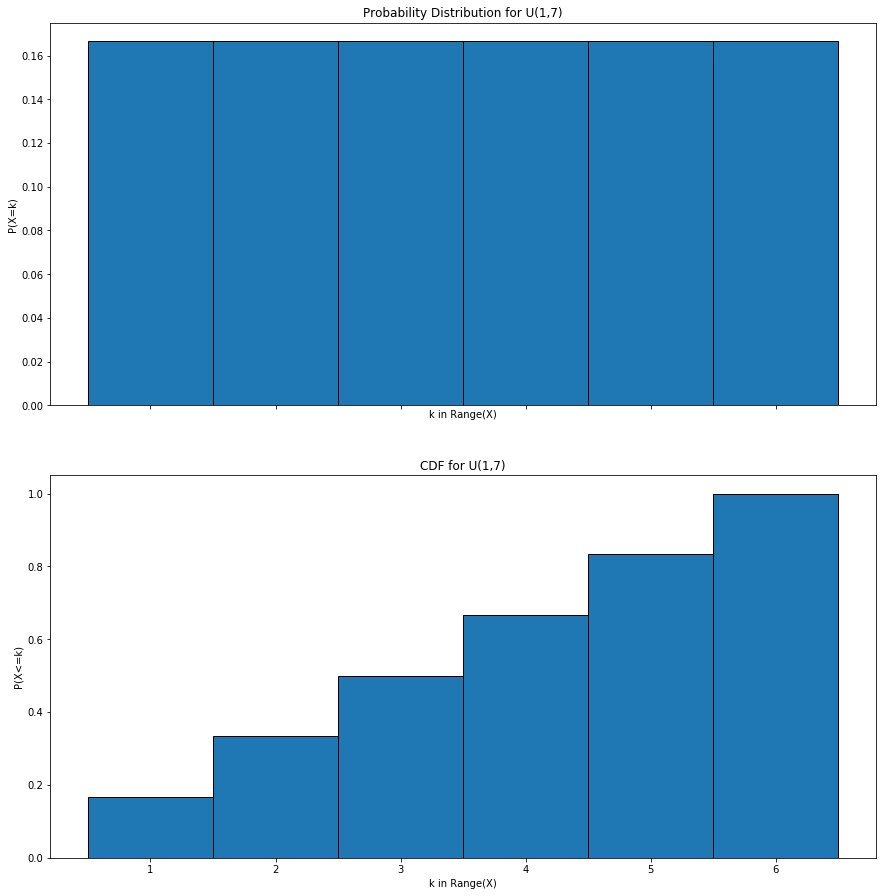

In [2]:
def display_uniform(a,b):
    X = list(range(a,b))
    probs = [a/(b-a) for k in X]
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(12,12), sharex=True) 
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    
    ax.bar(X,probs,tick_label=X, width=1.0,edgecolor='black')
    ax.set_title('Probability Distribution for U('+str(a)+',' +str(b)+')')
    ax.set_ylabel("P(X=k)")
    ax.set_xlabel("k in Range(X)")

    
    cum_probs = np.zeros(len(probs))
    for i in range(len(probs)):
        for j in range(i+1):
            cum_probs[i] += probs[j]
    ax1.bar(X,cum_probs,tick_label=X, width=1.0,edgecolor='black')
    ax1.set_title('CDF for U('+str(a)+',' +str(b)+')')
    ax1.set_ylabel("P(X<=k)")
    ax1.set_xlabel("k in Range(X)")
    plt.show()

    

# Modify the parameters in this next line to see different examples
display_uniform(1,7)

## Bernoulli Distribution: Bernoulli(p)

<b>Motivation:</b> The Bernoulli distribution describes the outcomes of a single trial with two outcomes, success or failure, where p = probability of success.

<b>Definition:</b>  If 1 = success and 0 = failure, then X ~ Bern(p) when

<blockquote>
$\begin{aligned}
    R_X & = \{ 0, 1 \} &\\
  f_X   &= \{ 1-p, p \} &\\
        & &\\
  E(X)   &= p &\\
  Var(X) &= p - p^2 = (1-p) p &\\
  \sigma_X &= \sqrt{(1-p) p} &\\
\end{aligned}$
</blockquote>
        
<b>Canonical Problem and Example:</b>  Flip a (possibly unfair) coin, where the probability of a head is p. Count the number of heads which appear. Suppose that p = 0.6, then:
 
<blockquote>
$\begin{aligned}
    S &= \{ 0,1 \} &\\
    P &= \{ 0.4, 0.6 \} &\\
\end{aligned}$
</blockquote>         

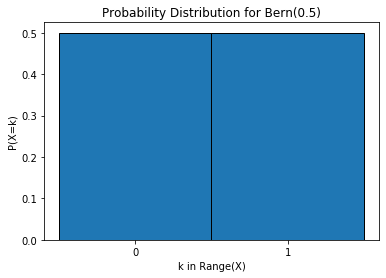

Rng(X) = [0, 1]
  f(X) = [0.5, 0.5]


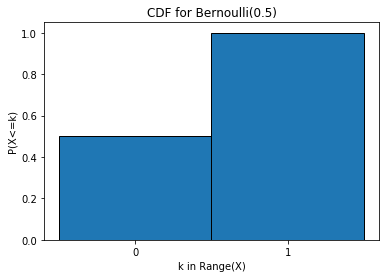

Rng(X) = [0, 1]
  F(X) = [0.5 1. ]


In [3]:
def display_bernoulli(p):
    X = [0,1]
    probs = [1-p,p]
    plt.bar(X,probs,tick_label=X, width=1.0,edgecolor='black')
    plt.title('Probability Distribution for Bern('+str(p)+')')
    plt.ylabel("P(X=k)")
    plt.xlabel("k in Range(X)")
    plt.show()
    print("Rng(X) = " + str(X))
    print("  f(X) = " + str(probs))
    
    cum_probs = np.zeros(len(probs))
    for i in range(len(probs)):
        for j in range(i+1):
            cum_probs[i] += probs[j]
    plt.bar(X,cum_probs, tick_label=X,width=1.0,edgecolor='black')
    plt.title('CDF for Bernoulli('+str(p)+')')
    plt.ylabel("P(X<=k)")
    plt.xlabel("k in Range(X)")
    plt.show()
    print("Rng(X) = " + str(X))
    print("  F(X) = " + str(cum_probs))
    

# Modify the parameters in this next line to see different examples
display_bernoulli(0.5)  

## Binomial Distribution: B(N,p)

<b>Motivation:</b> The binomial distribution describes the number of successes which occur among N independent and identically-distributed Bernoulli trials.

<b>Definition:</b>   $X \sim B(N,p)$ when

        
<blockquote>
$\begin{aligned}
    R_X & = \{\, 0, ..., N\, \} &\\
  f_X(k)   &= {N \choose k} \,p^k \,(1-p)^{ n-k} &\\
  E(X)   &= N\, p &\\
  Var(X) &= N\, (1-p)\, p &\\
  \sigma_X &= \sqrt{N (1-p) p} &\\
\end{aligned}$
</blockquote>
        
<b>Canonical Problem and Example:</b>  Throw a (possibly unfair) coin N times, where the probability of heads is p. What is the probability that k heads appear? For N = 5 and p = 0.5 we have:

<blockquote>
$\begin{aligned}
    S &= \{ 0,1,2,3,4,5 \} &\\
    f_X &= \{ \mbox{$\frac{1}{32}$}, \mbox{$\frac{5}{32}$},\mbox{$\frac{10}{32}$},\mbox{$\frac{10}{32}$},\mbox{$\frac{5}{32}$},\mbox{$\frac{1}{32}$} \} &\\
\end{aligned}$
</blockquote>


and $P(X=3)$ is $\frac{10}{32}$. 

        

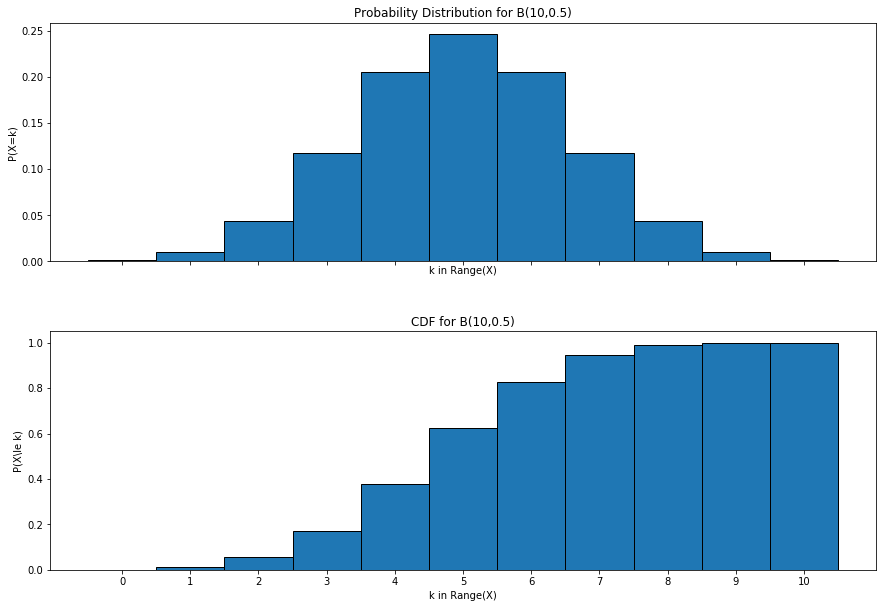

In [20]:
def f_binomial(N,p,k):
    return C(N,k) * (1-p)**(N-k) * (p**k)
    
def display_binomial(N,p):
    X = list(range(N+1))
    probs = [ f_binomial(N,p,k) for k in range(N+1)]
  #  print(probs)
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(12,8), sharex=True) 
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    
    ax.bar(X,probs,tick_label=X, width=1.0,edgecolor='black')

    ax.set_title('Probability Distribution for B('+str(N)+','+str(p)+')')
    ax.set_ylabel("P(X=k)")
    ax.set_xlabel("k in Range(X)")

    
    cum_probs = np.zeros(len(probs))

    for i in range(len(probs)):
        for j in range(i+1):
            cum_probs[i] += probs[j]
    ax1.bar(X,cum_probs, tick_label=X,width=1.0,edgecolor='black')
    ax1.set_title('CDF for B('+str(N)+','+str(p)+')')
    ax1.set_ylabel("P(X\le k)")
    ax1.set_xlabel("k in Range(X)")
    plt.show()
#    print(cum_probs)


# Modify the parameters in this next line to see different examples
display_binomial(10,0.5)


$$\binom{10,000}{5,000}$$

## Geometrical Distribution: G(p)

<b>Motivation:</b> This counts the number of i.i.d. Bernoulli trials until the first success occurs. 

<b>Definition and Example:</b> X ~ G(p) if
        
<blockquote>
$\begin{aligned}
    R_X & = \{ 1, 2, \ldots \} &\\
  f_X   &= (1-p)^{k-1}p &\\
        & &\\
  E(X)   &= \frac{1}{p} &\\
  Var(X) &= \frac{1-p}{p^2} &\\
    &  & \\
    P(X\gt k) &= {(1-p)^k} &\\
        P(X\le k) &= 1 - {(1-p)^k} &\\
\end{aligned}$
</blockquote>
                  
What is the probability when flipping a fair coin that it takes exactly 4 flips to get the first head?

<blockquote>

$    P(X=4) \; = \; (\mbox{$\frac{1}{2}$})^3(\mbox{$\frac{1}{2}$})\; =\; \mbox{$\frac{1}{32}$}$

</blockquote>






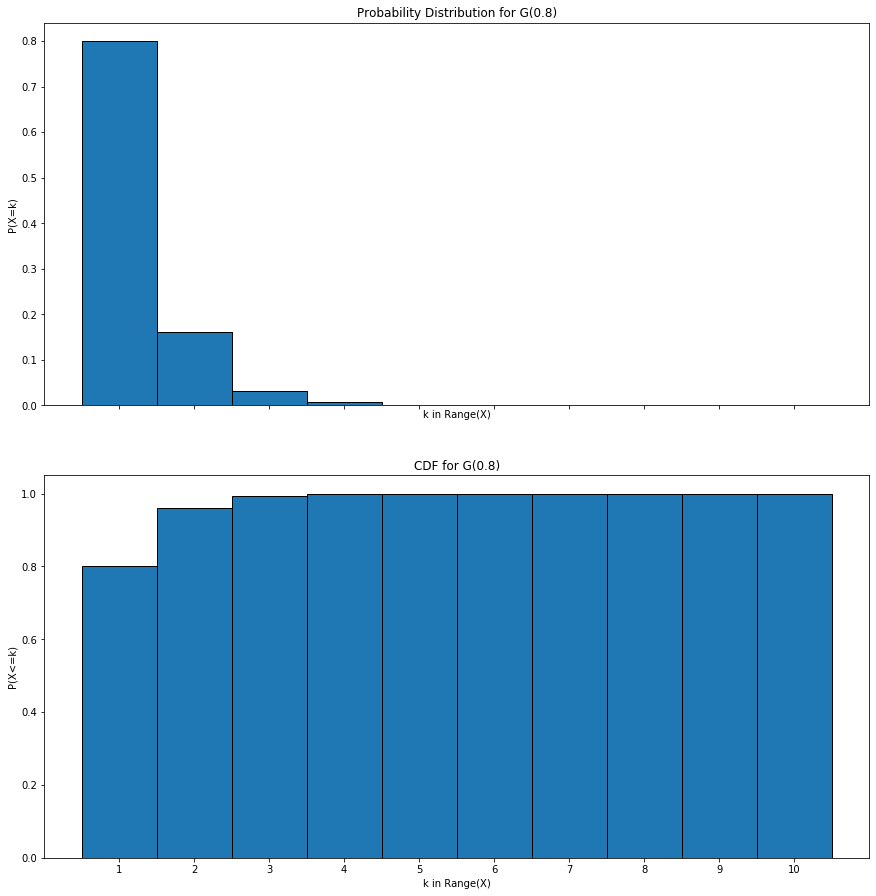

In [21]:
def f_geometric(k,p):
    return (1-p)**(k-1)*p

def display_geometric(p,limit=10):
    X = list(range(1,limit+1))
    probs = [ f_geometric(k,p) for k in range(1,limit+1)]
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(12,12), sharex=True) 
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    
    ax.bar(X,probs, tick_label=X,width=1.0,edgecolor='black')

    ax.set_title('Probability Distribution for G('+str(p)+')')
    ax.set_ylabel("P(X=k)")
    ax.set_xlabel("k in Range(X)")

    
    cum_probs = np.zeros(len(probs))
    for i in range(len(probs)):
        for j in range(i+1):
            cum_probs[i] += probs[j]
    ax1.bar(X,cum_probs, tick_label=X,width=1.0,edgecolor='black')
    ax1.set_title('CDF for G('+str(p)+')')
    ax1.set_ylabel("P(X<=k)")
    ax1.set_xlabel("k in Range(X)")
    plt.show()


# Modify the parameters in this next line to see different examples
display_geometric(0.8)

## Poisson Distribution: Poi(λ)

<b>Motivation:</b> If we have a process in which events arrive (hence, called arrivals) independently through time, with some mean rate λ = # arrivals/unit time, then the Poisson characterizes how many arrivals will occur in a randomly chosen time unit.

<b>Definition:</b> X ~ Poi(λ) if
        
<blockquote>
$\begin{aligned}
    Rng(X) & = \{ 0, 1, 2, \ldots \} &\\
  f(k)   &= \frac{\lambda^k \, e^{-\lambda}}{k\,!} &\\
        & &\\
  E(X)   &= \lambda &\\
  Var(X) &= \lambda &\\
\end{aligned}$
</blockquote>

where $e = 2.71828183\ldots$ (Euler's constant). 

<b>Canonial Example:</b> If emails arrive in my inbox on average 5 times an hour, what is the probability that in the next hour, only 4 emails will arrive?

        time unit = 1 hour, λ = 5, k = 4

<blockquote>
$\begin{aligned}
\text{Solution:} & \frac{5^4  e^{-5}}{4!}  = 0.1755.\\
\end{aligned}$
</blockquote>

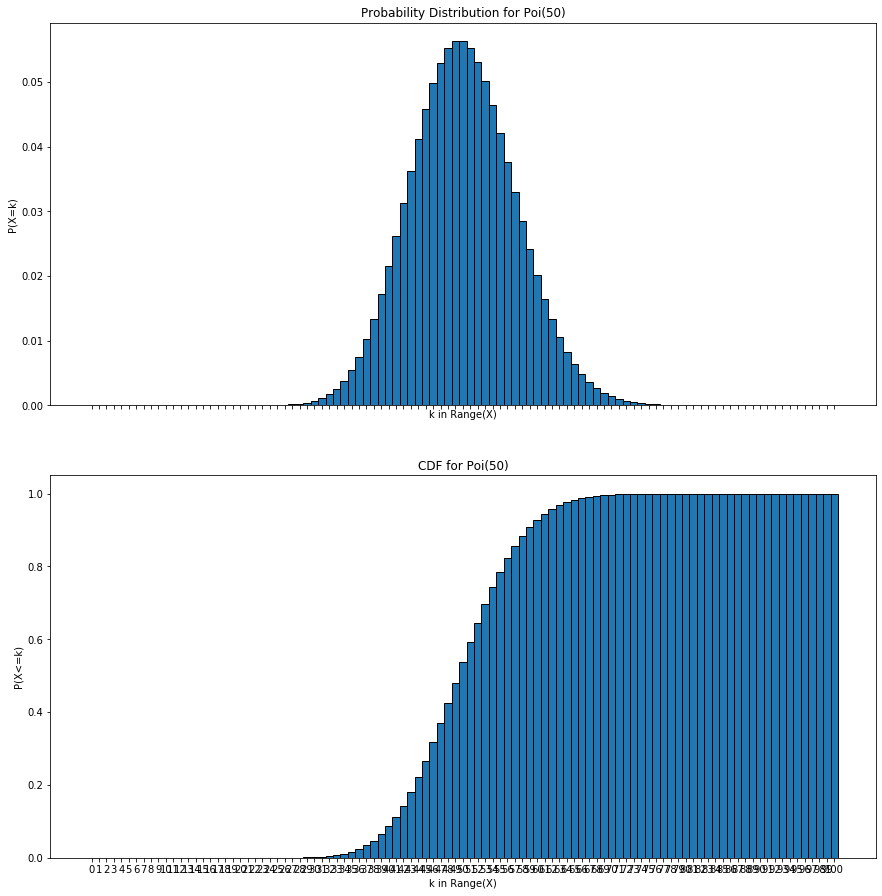

In [7]:

    
def f_poisson(lam,k):
    return lam**k/(math.factorial(k)*(np.e ** lam))

def display_poisson(lam,limit=15):
    X = list(range(limit+1))
    probs = [ f_poisson(lam,k) for k in range(limit+1)]
    
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(12,12), sharex=True) 
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    ax.bar(X,probs,tick_label=X, width=1.0,edgecolor='black')
    ax.set_title('Probability Distribution for Poi('+str(lam)+')')
    ax.set_ylabel("P(X=k)")
    ax.set_xlabel("k in Range(X)")
    
    cum_probs = np.zeros(len(probs))
    for i in range(len(probs)):
        for j in range(i+1):
            cum_probs[i] += probs[j]
    ax1.bar(X,cum_probs, tick_label=X,width=1.0,edgecolor='black')
    ax1.set_title('CDF for Poi('+str(lam)+')')
    ax1.set_ylabel("P(X<=k)")
    ax1.set_xlabel("k in Range(X)")
    plt.show()


# Modify the parameters in this next line to see different examples
display_poisson(50,limit=100)

## Poisson Approximation to the Binomial

The Poisson is regarded as a good approximation for the Binomial when N is large (say $\ge 50$) and p is small (so that $Np \le 5$). In this section we will compare the two and quantify the accuracy of the approximation.  

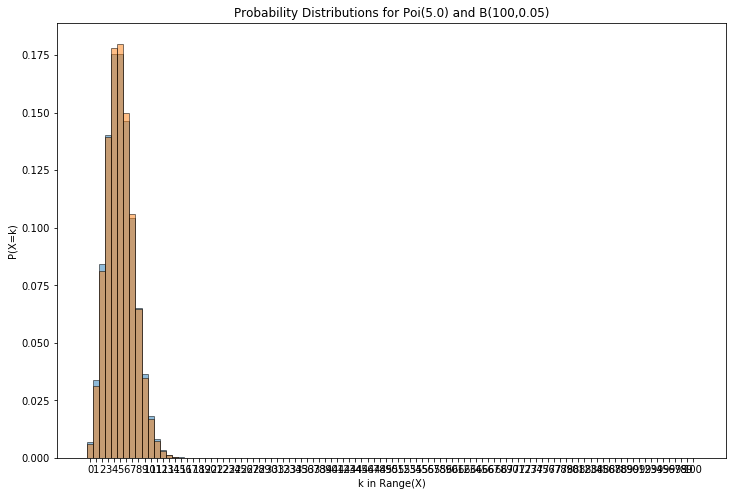

Sum of Absolute Differences: 0.0252
Sum of Squared Differences:  0.0001
Euclidean Distance:          0.0082


In [8]:
def display_poisson_and_binomial(N,p):
    X = list(range(N+1))
    lam = p*N
    probs1 = [ f_poisson(lam,k) for k in range(N+1)]
    probs2 = [ f_binomial(N,p,k) for k in range(N+1)]
    
    fig, ax = plt.subplots(1,1,figsize=(12,8)) 
    ax.bar(X,probs1,tick_label=X, width=1.0,edgecolor='black',alpha=0.5)
    ax.bar(X,probs2,tick_label=X, width=1.0,edgecolor='black',alpha=0.5)
 #   ax.scatter(X,probs2)
 #   ax.plot(X,probs2,'--',alpha=0.3)
    ax.set_title('Probability Distributions for Poi('+str(lam)+') and B(' + str(N) +',' +str(p)+')')
    ax.set_ylabel("P(X=k)")
    ax.set_xlabel("k in Range(X)") 
    plt.show()
    
    sum = 0
    for k in range(N+1):
        sum += abs(probs1[k]-probs2[k])
    print("Sum of Absolute Differences: " + str(round4(sum)))
    
    sum = 0
    for k in range(N+1):
        sum += (probs1[k]-probs2[k])**2
    print("Sum of Squared Differences:  " + str(round4(sum)))
    
    print("Euclidean Distance:          " + str(round4(sum**0.5)))
    
display_poisson_and_binomial(100,0.05)
    

## Exponential Distribution: Exp(λ)

<b>Motivation:</b> If we have a process in which events arrive (hence, called <i>arrivals</i>) independently through time, with some mean rate λ = # arrivals/unit time, then the Exponential characterizes the inter-arrival time, e.g., "how long until the next arrival"?

<b>Definition:</b> X ~ Exp(λ) if
        
<blockquote>
$\begin{aligned}
    Rng(X) & = [ 0, \infty ) &\\
  f(t)   &= \,\lambda \, e^{-\lambda\, t} &\\
  F(t)   &=  1.0 - \, e^{-\lambda\, t} &\\
        & &\\
  E(X)   &= \frac{1}{\lambda} &\\
  Var(X) &= \frac{1}{\lambda^2} &\\
         & &\\
    P(X > t)    &= e^{-\lambda\, t} &\\
  P(X \le t)  &=  1.0 - \, e^{-\lambda\, t} &\\
\end{aligned}$
</blockquote>

where $e = 2.71828183\ldots$ (Euler's constant). 

NOTE: Sometimes the exponential is specified by using the expected value, which is denoted $\beta$; i.e., 
$$\beta = \frac{1}{\lambda}.$$
Then we simply replace $\lambda$ in all the formulae by $\frac{1}{\beta}$:
<blockquote>
$\begin{aligned}
  f(t)   &= \,\frac{e^{-\frac{t}{\beta}}}{\beta} &\\
  F(t)   &=  1.0 - \, e^{-\frac{t}{\beta}} &\\
        & &\\
  E(X)   &= {\beta} &\\
  Var(X) &= {\beta^2} &\\
         & &\\
    P(X > t)    &= e^{-\frac{t}{\beta}} &\\
  P(X \le t)  &=  1.0 - \, e^{-\frac{t}{\beta}} &\\
\end{aligned}$
</blockquote>

<b>Canonial Example:</b> If earthquakes occur on average 3 times per year, what is the probability that the next earthquake will occur within the next six months?

        time unit = year, λ = 3, t = 0.5

<blockquote>
$\begin{aligned}
\text{Solution:} &\; 1.0 - \, e^{-3 / 2} = 0.7769.\\
\end{aligned}$
</blockquote>

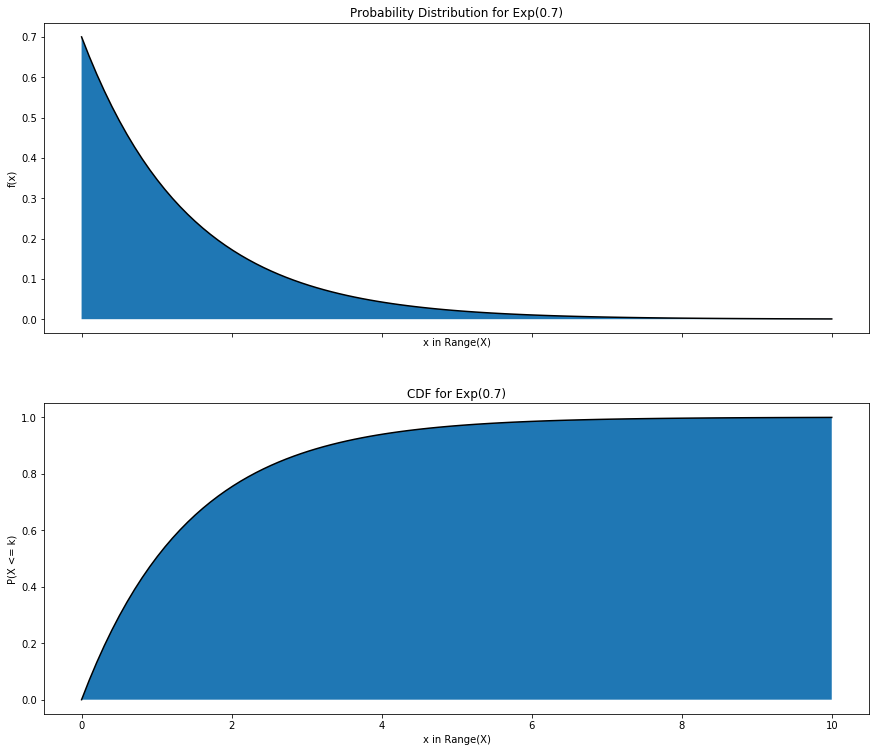

In [9]:
def f_exponential(lam,t):
    return lam*np.exp(-lam*t)

def F_exponential(lam,t):
    return 1.0 - np.exp(-lam*t)

def display_exponential(lam,limit=10):
    X = np.linspace(0,limit,100)
    Y = [f_exponential(lam,t) for t in X]
    YCum = [F_exponential(lam,t) for t in X]
    
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(12,10), sharex=True)
   # fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    
    ax.fill_between(X, Y, interpolate=True)
    ax.plot(X,Y,color='k')
    ax.set_title('Probability Distribution for Exp('+str(lam)+')')
    ax.set_ylabel("f(x)")
    ax.set_xlabel("x in Range(X)")
    

    ax1.set_title('CDF for Exp('+str(lam)+')')
    ax1.set_ylabel("P(X <= k)")
    ax1.set_xlabel("x in Range(X)")
    ax1.fill_between(X, YCum, interpolate=True)
    ax1.plot(X,YCum,color='k')
    plt.show()
    
print()
display_exponential(0.7)
print()

## Normal Distribution: N( $\mu$, $\sigma^2$ )

<b>Motivation:</b> The normal is the limiting case of the binomial $B(N,1/2)$ as $N \rightarrow \infty$, parameterized with respect to its mean and variance.  It describes the distribution of data expressed as real numbers which exhibits the "bell-shaped curve"; this describes a wide variety of phenomena such as in biostatistics (height, weight, dimension of various body parts, intelligence, etc.), errors in measurement, etc. 

<b>Definition:</b> $X \sim N( \mu, \sigma^2 )$, where $\mu$ is the mean and $\sigma$ the standard deviation, if
        
<blockquote>
$\begin{aligned}
    Rng(X) & = (-\infty, \infty ) &\\   
    f(x) &= \frac{1}{{\sigma \sqrt {2\pi } }}e^{-(x-\mu)^2 \,/\, 2\sigma^2} &\\
    F(x)   &=  \frac{1}{2} \left[ 1 + erf\left( \frac{x-\mu}{\sigma\sqrt{2}}   \right)\right] &\\
        & &\\
    E(X)   &= \mu &\\
    Var(X) &= \sigma^2 &\\
         & &\\

\end{aligned}$
</blockquote>
 

<b>Canonial Example:</b> If the heights of BU students are normally distributed with $\mu = 66$ and $\sigma=3$ (inches), what is the probability that a randomly-selected student will be taller than 6 feet?

Solution: The variance is 9, so we have $X\sim N(66,9)$ and we are asking for $P(X>72) = 1.0 - P(X<72)$.

<blockquote>
$\begin{aligned}
\text{Solution:} &\; 1.0 - \, F(72) = 0.0228.\\
\end{aligned}$
</blockquote>

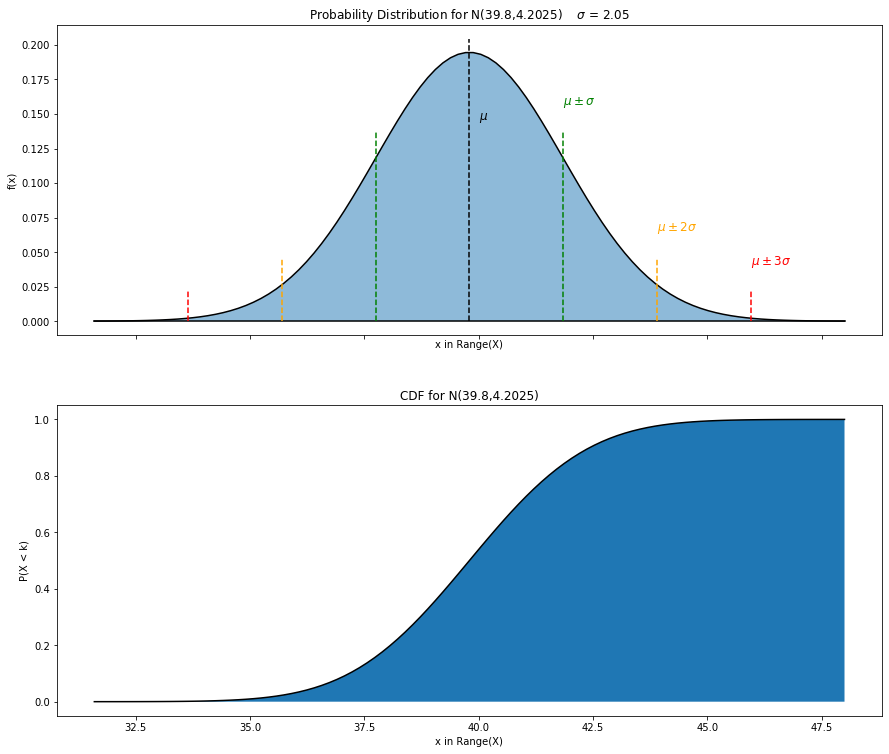

In [10]:
# PDF and CDF for normal: note that these take the variance as a parameter, not standard deviation

def f_normal(mu,var,x):
    return (1/(math.sqrt(var*2*math.pi))) * math.exp(-(x-mu)*(x-mu)/(2*var))
    
def F_normal(mu,var,x):
    return (1 + math.erf((x-mu)/(var**0.5 * 2.0**0.5))) / 2
    
def normalRange(mu,var,low,high):
    return F(mu,var,high) - Phi(mu,var,low)


def display_normal(mu,var,limit=4,absoluteLimits=False,lo=0,hi=0,showSigmas=True):     # limit is +/- in terms of standard deviations
    sigma = var**0.5
    X = np.linspace(mu-sigma*limit,mu+sigma*limit,100)
    Y = [f_normal(mu,var,x) for x in X]
    YCum = [F_normal(mu,var,t) for t in X]
    
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(12,10), sharex=True)
   # fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    
    ax.fill_between(X, Y, interpolate=True,alpha=0.5)
    ax.plot(X,Y,color='k')
    ax.set_title('Probability Distribution for N('+str(mu)+','+str(var)+')    $\sigma$ = ' + str(round4(sigma)))
    ax.set_ylabel("f(x)")
    ax.set_xlabel("x in Range(X)")
    if(absoluteLimits):
        ax.set_xlim([lo,hi])
    

    ax1.set_title('CDF for N('+str(mu)+','+str(var)+')')
    ax1.set_ylabel("P(X < k)")
    ax1.set_xlabel("x in Range(X)")
    
    ax1.fill_between(X, YCum, interpolate=True)
    ax1.plot(X,YCum,color='k') 
    
    if(showSigmas):
        extra = f_normal(mu,var,mu) / 10
        ax.plot([mu-sigma*limit,mu+sigma*limit],[0,0],color='k')

        ax.plot([mu,mu],[0,f_normal(mu,var,mu)+extra/2],'--',color='k')
        ax.text(mu+sigma/10,0.75*f_normal(mu,var,mu),r'$\mu$',fontsize=12,color='k')
    
        ax.plot([mu-sigma,mu-sigma],[0,f_normal(mu,var,mu-sigma)+extra],'--',color='g')
        ax.plot([mu+sigma,mu+sigma],[0,f_normal(mu,var,mu+sigma)+extra],'--',color='g')
        ax.text(mu+sigma,f_normal(mu,var,mu-sigma)+2*extra,r'$\mu\pm\sigma$',fontsize=12,color='g')
    
        ax.plot([mu-2*sigma,mu-2*sigma],[0,f_normal(mu,var,mu-2*sigma)+extra],'--',color='orange')
        ax.plot([mu+2*sigma,mu+2*sigma],[0,f_normal(mu,var,mu+2*sigma)+extra],'--',color='orange')
        ax.text(mu+2*sigma,f_normal(mu,var,mu+2*sigma)+2*extra,r'$\mu\pm2\sigma$',fontsize=12,color='orange')
    
        ax.plot([mu-3*sigma,mu-3*sigma],[0,f_normal(mu,var,mu-3*sigma)+extra],'--',color='r')
        ax.plot([mu+3*sigma,mu+3*sigma],[0,f_normal(mu,var,mu+3*sigma)+extra],'--',color='r')
        ax.text(mu+3*sigma,f_normal(mu,var,mu+3*sigma)+2*extra,r'$\mu\pm3\sigma$',fontsize=12,color='r')
    
    plt.show()
    
print()
display_normal(39.8,2.05*2.05)
print()

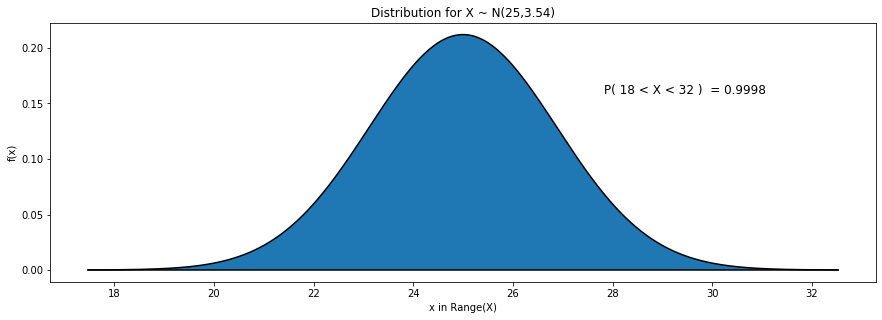

In [11]:
def display_normal_range(mu,var,lo=0,hi=0,leftSideOnly=False,rightSideOnly=False,limit=4):     # limit is +/- in terms of standard deviations
    sigma = var**0.5
    X = np.linspace(mu-sigma*limit,mu+sigma*limit,1000)
    Y = [f_normal(mu,var,x) for x in X]
    if(leftSideOnly):
        Xrange = [x for x in X if(x <= hi)]
        Yrange = [f_normal(mu,var,x) for x in Xrange]
    elif(rightSideOnly):
        Xrange = [x for x in X if(x>=lo)]
        Yrange = [f_normal(mu,var,x) for x in Xrange]
    else:
        Xrange = [x for x in X if(x>=lo and x <= hi)]
        Yrange = [f_normal(mu,var,x) for x in Xrange]
    
    fig, ax = plt.subplots(1,1,figsize=(12,4), sharex=True)
   # fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    
    ax.fill_between(Xrange, Yrange, interpolate=True)
    ax.plot(X,Y,color='k')
    ax.plot([mu-sigma*limit,mu+sigma*limit],[0,0],color='k')
    if(not leftSideOnly):
        ax.plot([lo,lo], [0, f_normal(mu,var,lo)],'--', color='red')
    if(not rightSideOnly):
        ax.plot([hi,hi], [0, f_normal(mu,var,hi)],'--', color='red')
    ax.set_title('Distribution for X ~ N('+str(mu)+','+str(var)+')')
    ax.set_ylabel("f(x)")
    ax.set_xlabel("x in Range(X)")
    
    if(leftSideOnly):
        ans = F_normal(mu,var,hi)
        ax.text(mu+1.5*sigma,0.75*f_normal(mu,var,mu),'P( X < ' + str(hi)+ ' )  = ' + str(round4(ans)),fontsize=12)
    elif(rightSideOnly):
        ans = 1.0 - F_normal(mu,var,lo) 
        ax.text(mu+1.5*sigma,0.75*f_normal(mu,var,mu),'P( X > '+str(lo)+ ' )  = ' + str(ans),fontsize=12)
        #ax.text(mu+1.5*sigma,0.75*f_normal(mu,var,mu),'P( X > '+str(lo)+ ' )  = ' + str(round4(ans)),fontsize=12)
    else:
        ans = F_normal(mu,var,hi) - F_normal(mu,var,lo)
        ax.text(mu+1.5*sigma,0.75*f_normal(mu,var,mu),'P( '+str(lo)+ ' < X < ' + str(hi)+ ' )  = ' + str(round4(ans)),fontsize=12)
    
    plt.show()
    
display_normal_range(25, 3.54,lo=18,hi=32)

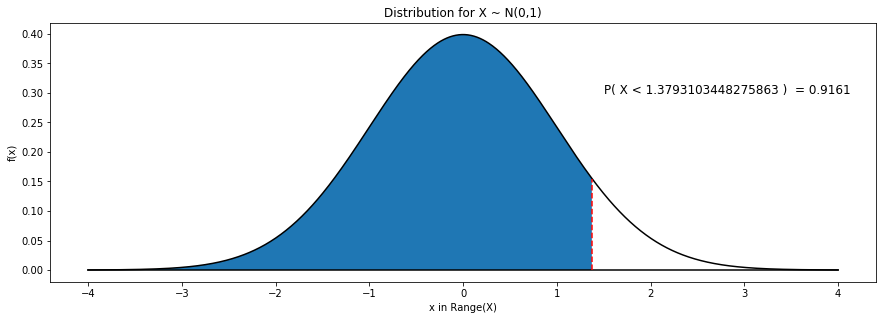

In [12]:
display_normal_range(0, 1,hi=(70-68)/1.45,leftSideOnly=True)

In [13]:
print((200*0.25*0.75)**0.5)

6.123724356957945


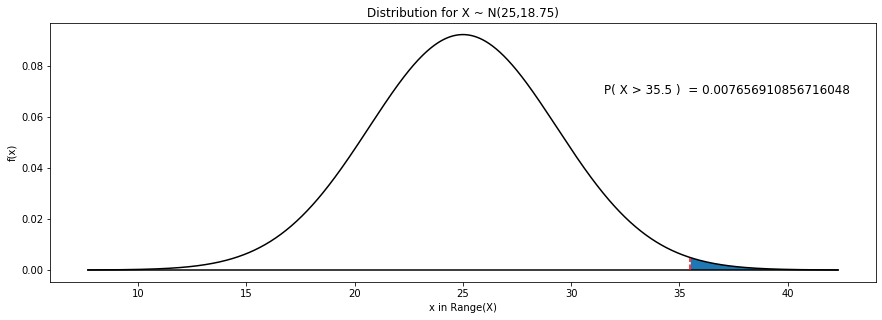

In [14]:
display_normal_range(25,18.75,lo=35.5,rightSideOnly=True)

## Normal Approximation to the Binomial
Since the normal distribution with $p$ close to $0.5$ can be viewed as the limit of the binomial as $N$ gets large, we can use the normal distribution to approximate the binomial. We must define the normal in terms of the mean of the binomial, $Np$, and the variance of the binomial, $Np(1-p)$. 

First we show the relationship between the a binomial B(N,p) and a normal with the same mean and variance, i.e., $N(Np,Np(1-p))$, then show how the approximation works, then present a way of making the approximation more accurate. 


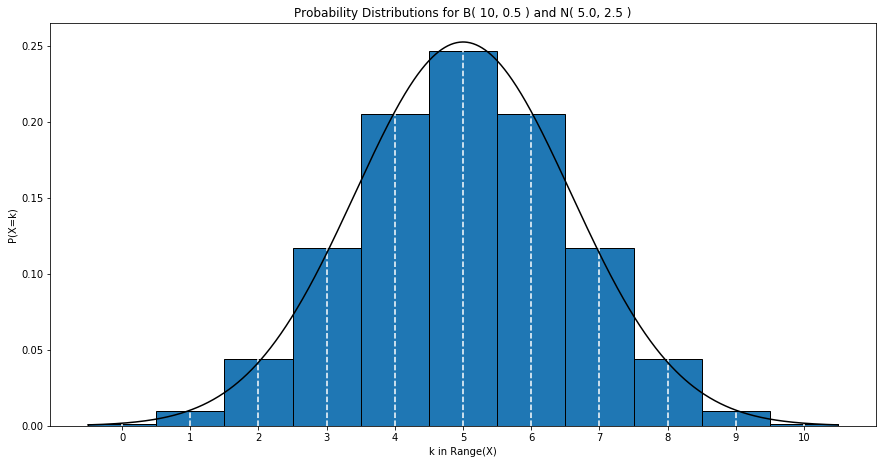

In [15]:

def display_binomial_and_normal(N,p=0.5):
    X = list(range(N+1))
    probs = [ f_binomial(N,p,k) for k in range(N+1)]
    fig, ax = plt.subplots(1,1,figsize=(12,6), sharex=True) 
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    
    ax.bar(X,probs,tick_label=X, width=1.0,edgecolor='black')
    # draw center lines in bins
    for k in range(N+1):
        ax.plot([k,k],[0,probs[k]],'--',color='w')
        
    # now draw normal on top of it
    X2 = np.linspace(-0.5,N+0.5,1000)
    Y = [f_normal(N*p,N*p*(1-p),x) for x in X2]
    print()
    ax.plot(X2,Y,color='black')

    ax.set_title('Probability Distributions for B( '+str(N)+', '+str(p)+' ) and N( '+str(N*p)+', '+str(N*p*(1-p))+' )')
    ax.set_ylabel("P(X=k)")
    ax.set_xlabel("k in Range(X)")

    
    plt.show()

# Change N to see the relationship; note that p = 0.5
N = 10
display_binomial_and_normal(N)

In [16]:
def display_binomial_and_normal_range(N,p=0.5,lo=0,hi=0,leftSideOnly=False,rightSideOnly=False,limit=4):     # limit is +/- in terms of standard deviations
    mu = N*p
    var = N*p*(1-p)
    sigma = var**0.5
    
    X2 = list(range(N+1))
    probs = [ f_binomial(N,p,k) for k in range(N+1)]
    fig, ax = plt.subplots(1,1,figsize=(12,6), sharex=True) 
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    
    ax.bar(X2,probs,tick_label=X2, width=1.0,edgecolor='black',alpha=0.5)
    # draw center lines in bins
    for k in range(N):
        ax.plot([k,k],[0,probs[k]],'--',color='w')
        
    X = np.linspace(mu-sigma*limit,mu+sigma*limit,1000)
    Y = [f_normal(mu,var,x) for x in X]
    if(leftSideOnly):
        Xrange = [x for x in X if(x <= hi)]
        Yrange = [f_normal(mu,var,x) for x in Xrange]
    elif(rightSideOnly):
        Xrange = [x for x in X if(x>=lo)]
        Yrange = [f_normal(mu,var,x) for x in Xrange]
    else:
        Xrange = [x for x in X if(x>=lo and x <= hi)]
        Yrange = [f_normal(mu,var,x) for x in Xrange]
    
   # fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=6.0)
    plt.setp(ax.get_xticklabels(), visible=True)
    
    ax.fill_between(Xrange, Yrange, interpolate=True)
    ax.plot(X,Y,color='k')
    ax.plot([mu-sigma*limit,mu+sigma*limit],[0,0],color='k')
    if(not leftSideOnly):
        ax.plot([lo,lo], [0, f_normal(mu,var,lo)],'--', color='red')
    if(not rightSideOnly):
        ax.plot([hi,hi], [0, f_normal(mu,var,hi)],'--', color='red')
    ax.set_title('Distribution for X ~ N('+str(mu)+','+str(var)+')')
    ax.set_ylabel("f(x)")
    ax.set_xlabel("x in Range(X)")
    
    if(leftSideOnly):
        ans = F_normal(mu,var,hi)
        ax.text(mu+1.5*sigma,0.75*f_normal(mu,var,mu),'P( X <= ' + str(hi)+ ' )  = ' + str(round4(ans)),fontsize=12)
    elif(rightSideOnly):
        ans = 1.0 - F_normal(mu,var,lo) 
        ax.text(mu+1.5*sigma,0.75*f_normal(mu,var,mu),'P( X => '+str(lo)+ ' )  = ' + str(round4(ans)),fontsize=12)
    else:
        ans = F_normal(mu,var,hi) - F_normal(mu,var,lo)
        ax.text(mu+1.5*sigma,0.75*f_normal(mu,var,mu),'P( '+str(lo)+ ' <= X <= ' + str(hi)+ ' )  = ' + str(round4(ans)),fontsize=12)
    
    plt.show()

## Continuity Correction
When using a continuous distribution to approximate a discrete distribution, you will generally get a better
approximation if you include the entire bin for the lower and upper bounds: to do this, subtract 0.5 from the 
lower bound and add 0.5 to the upper bound. You can see the effect of this by changing the lower and upper bounds in the
next cell. Search for "continuity correction normal approximation to binomial" on Google or Youtube to get further explanation. 

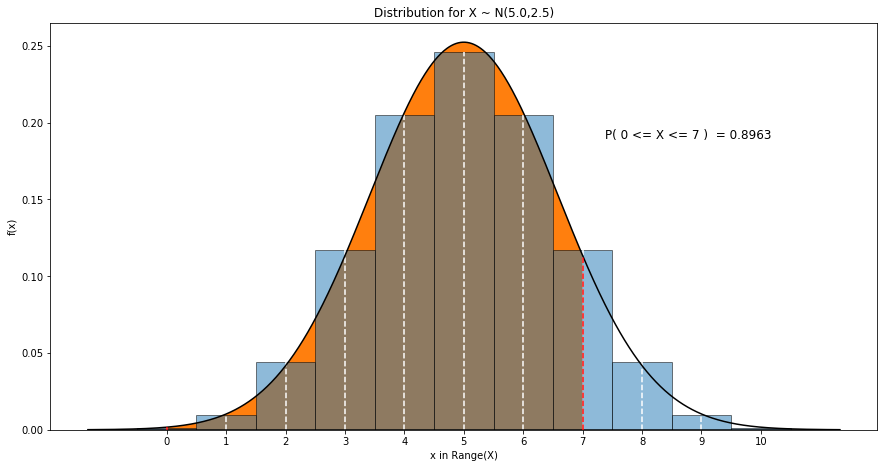

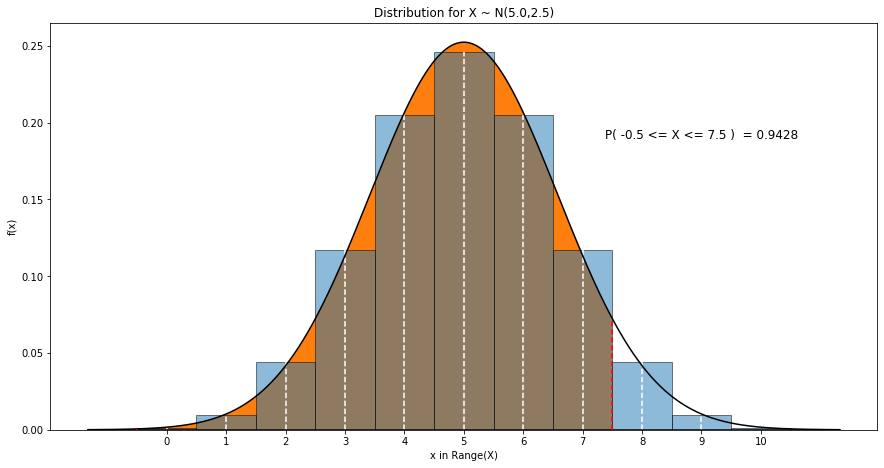

In [17]:
# change these to see effect of continuity correction: 
N = 10
lowerBound = 0
upperBound =7
# First show without the continuity correction    
display_binomial_and_normal_range(N,0.5,lo=lowerBound,hi=upperBound)

# Now show with the continuity correction: subtract 0.5 from lower bound and add 0.5 to upper bound
display_binomial_and_normal_range(N,0.5,lo=lowerBound-0.5,hi=upperBound+0.5)